# Exploratory Data Analysis

## Load data

In [1]:
import pandas as pd

def load_csv_data(filename):
    """
    Load data from a CSV file and return a pandas DataFrame.

    Args:
        filename (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded data.
    """
    try:
        # timestamp as datetime, date as date, label as category
        df = pd.read_csv(filename, parse_dates=['timestamp', 'date'])
        return df
    except FileNotFoundError:
        print(f"File '{filename}' not found. Please check the path.")
        return None


In [2]:
# load csv data
csv_filename = "hour01.csv"
data_df = load_csv_data(csv_filename)
if data_df is not None:
    print(f"Loaded {len(data_df)} rows from {csv_filename}.")


Loaded 18360 rows from hour01.csv.


In [3]:
# print info
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         18360 non-null  object        
 1   timestamp  18360 non-null  datetime64[ns]
 2   mean       18360 non-null  float64       
 3   sum        18360 non-null  int64         
 4   median     18360 non-null  float64       
 5   std        18360 non-null  float64       
 6   var        18360 non-null  float64       
 7   min        18360 non-null  float64       
 8   max        18360 non-null  float64       
 9   date       18360 non-null  datetime64[ns]
 10  label      18360 non-null  int64         
dtypes: datetime64[ns](2), float64(6), int64(2), object(1)
memory usage: 1.5+ MB
None


In [4]:
# print head
print(data_df.head())

            id           timestamp       mean  sum  median        std  \
0  condition_1 2003-05-08 00:00:00   8.000000  480     0.0  42.225785   
1  condition_1 2003-05-08 01:00:00   4.083333  245     0.0  20.495797   
2  condition_1 2003-05-08 02:00:00   7.066667  424     0.0  36.392804   
3  condition_1 2003-05-08 03:00:00   4.033333  242     0.0  20.158664   
4  condition_1 2003-05-08 04:00:00  12.216667  733     0.0  30.018690   

           var  min    max       date  label  
0  1783.016949  0.0  296.0 2003-05-08      1  
1   420.077684  0.0  154.0 2003-05-08      1  
2  1324.436158  0.0  268.0 2003-05-08      1  
3   406.371751  0.0  120.0 2003-05-08      1  
4   901.121751  0.0  116.0 2003-05-08      1  


## Descriptive Statistics

### Overall Statistics

In [5]:
# print date range
print(f"Date range: {data_df['timestamp'].min()} to {data_df['timestamp'].max()}\n")
# print number of unique days
print(f"Number of unique days: {data_df['timestamp'].dt.date.nunique()}\n")
# print number of unique hours
print(f"Number of unique hours: {data_df['timestamp'].dt.hour.nunique()}\n")
# print number of unique ids
print(f"Number of unique ids: {data_df['id'].nunique()}\n")
# print averge number of days per id for each label
print("Average number of days per id for each label: ")
print(data_df.groupby("label")['timestamp'].nunique() / data_df.groupby("label")['id'].nunique())


Date range: 2002-05-25 00:00:00 to 2006-02-13 23:00:00

Number of unique days: 445

Number of unique hours: 24

Number of unique ids: 55

Average number of days per id for each label: 
label
0    164.250000
1    262.956522
dtype: float64


In [6]:
# describe data
#print(data_df.describe())

# describe data by label
print(data_df.groupby("label", observed=False)[['mean', 'median']].describe())


          mean                                                      \
         count        mean         std  min        25%         50%   
label                                                                
0      10656.0  279.945206  278.315452  0.0  22.229167  231.841667   
1       7704.0  183.388603  225.269431  0.0  16.166667  101.191667   

                                 median                                    \
              75%          max    count        mean         std  min  25%   
label                                                                       
0      435.912500  4007.366667  10656.0  208.006006  267.335547  0.0  0.0   
1      271.670833  2172.950000   7704.0  126.512656  213.897438  0.0  0.0   

                               
         50%      75%     max  
label                          
0      117.5  336.125  5437.0  
1       18.0  171.000  2668.0  


In [7]:
# mean of mean
print(f"Mean of mean: {data_df['mean'].mean()}")
# median of mean
print(f"Median of mean: {data_df['mean'].median()}")
# variance of mean
print(f"Variance of mean: {data_df['mean'].var()}")
# standard deviation of mean
print(f"Standard deviation of mean: {data_df['mean'].std()}")
# skewness of mean
print(f"Skewness of mean: {data_df['mean'].skew()}")
# kurtosis of mean
print(f"Kurtosis of mean: {data_df['mean'].kurtosis()}")


Mean of mean: 239.42929829339144
Median of mean: 164.63333333333333
Variance of mean: 68517.72195808981
Standard deviation of mean: 261.75890043719585
Skewness of mean: 1.833324521975532
Kurtosis of mean: 8.176250425137336


* skewness indicates a right-skewed distribution - longer tail on the right
* kurtosis measures peakedness or flatness of distribution - negative means slightly flatter than normal distribution

![hourly stripplot](./hourly_stripplot.png)

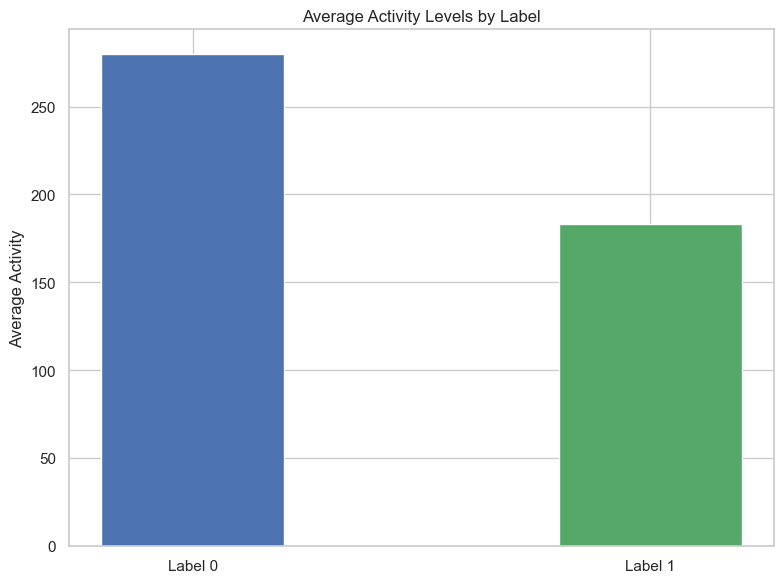

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# average activity by label
average_activity = data_df.groupby('label')['mean'].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Label 0', 'Label 1']
x = np.arange(len(labels))
width = 0.4

rects = ax.bar(x, average_activity, width, label='Average Activity', color=['b', 'g'])

# Customize the plot
#ax.set_xlabel('Labels')
ax.set_ylabel('Average Activity')
ax.set_title('Average Activity Levels by Label')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

plt.tight_layout()
plt.show()


### linking R

In [20]:
# install rpy2
#!pip install rpy2

#import os
#print(os.getenv("R_HOME"))

#echo %R_HOME%

%load_ext rpy2.ipython

#%%R -i data_df
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
#library(ggplot2)

c:\Users\zoona\Anaconda3\envs\igp5_env\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [21]:
%%R -i data_df

# moments library
#install.packages("moments", repos='http://cran.us.r-project.org', quiet=TRUE)
library(moments)

#  skewness
skewnewss <- skewness(data_df$mean)
print(skewnewss)

# Calculate kurtosis
kurtosis <- kurtosis(data_df$mean)
print(kurtosis)


[1] 1.833175
[1] 11.1737


### Between Groups

#### T-test between groups

In [12]:
# evaluate if there is a difference between labels with t-test
alpha = 0.05
from scipy.stats import ttest_ind
label_0 = data_df[data_df["label"] == 0]["mean"]
label_1 = data_df[data_df["label"] == 1]["mean"]
ttest_result = ttest_ind(label_0, label_1)

# print t-test result
print(f"t-test p-value: {ttest_result.pvalue}")
if ttest_result.pvalue < alpha:
    print("There is a significant difference between the two labels.")


t-test p-value: 1.4535340336727957e-136
There is a significant difference between the two labels.


### Plotting key statistics between labels

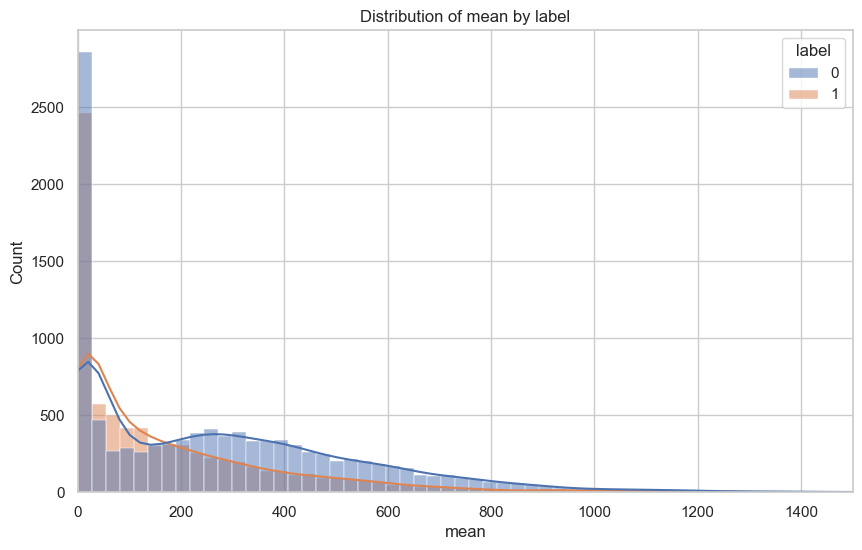

In [15]:
# plot distribution of mean by label
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=data_df, x="mean", hue="label", kde=True)
# set xlim
plt.xlim(0, 1500)
plt.title("Distribution of mean by label")
plt.show()





In [16]:
# calculate mean of 'statistic' by label
def calculate_statistic_by_label(data_df, statistic):
    """
    Calculate the mean of a statistic by label.

    Args:
        data_df (pd.DataFrame): Data.
        statistic (str): Statistic to calculate.

    Returns:
        pd.Series: Mean of the statistic by label.
    """
    return data_df.groupby("label")[statistic].mean()


Mean of mean by label:
label
0    279.945206
1    183.388603
Name: mean, dtype: float64


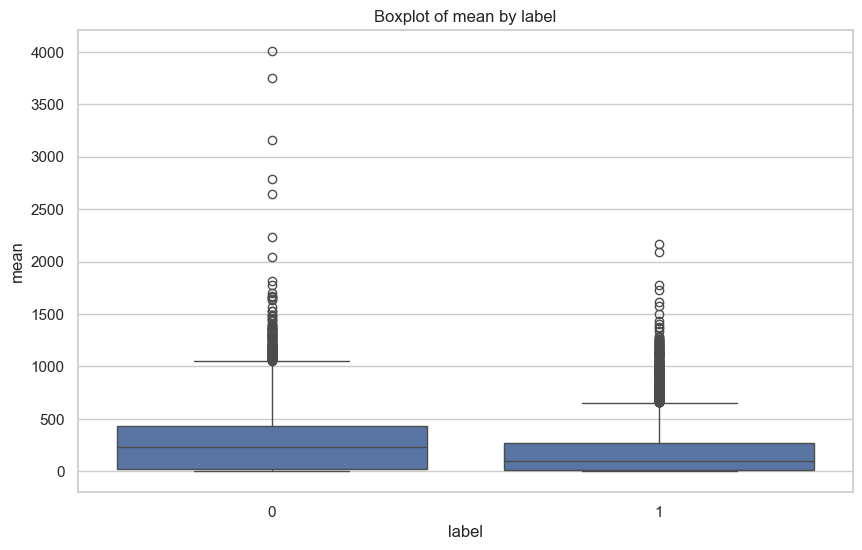



Mean of median by label:
label
0    208.006006
1    126.512656
Name: median, dtype: float64


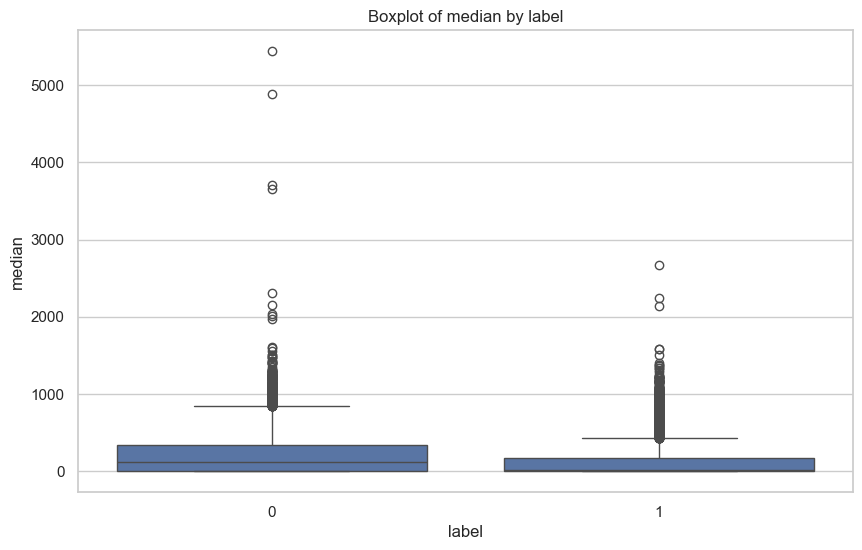



Mean of max by label:
label
0    1195.437218
1     886.978842
Name: max, dtype: float64


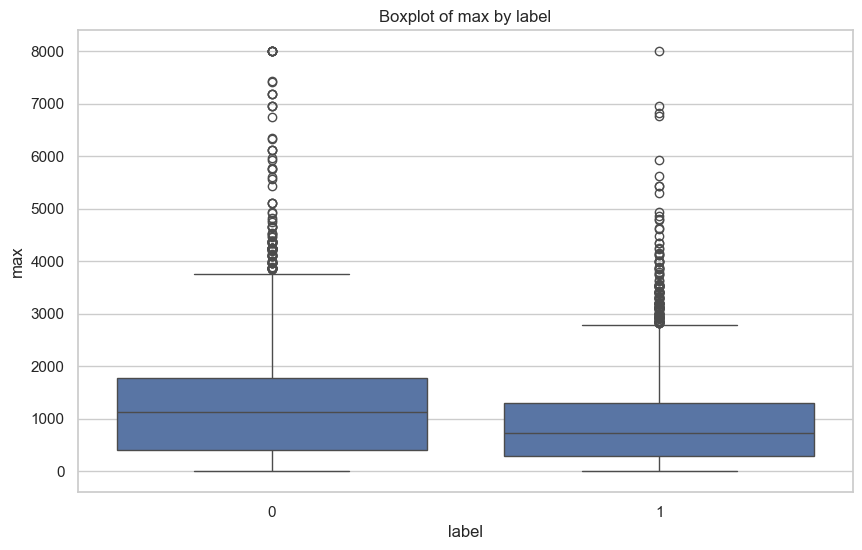



Mean of std by label:
label
0    262.025193
1    190.380953
Name: std, dtype: float64


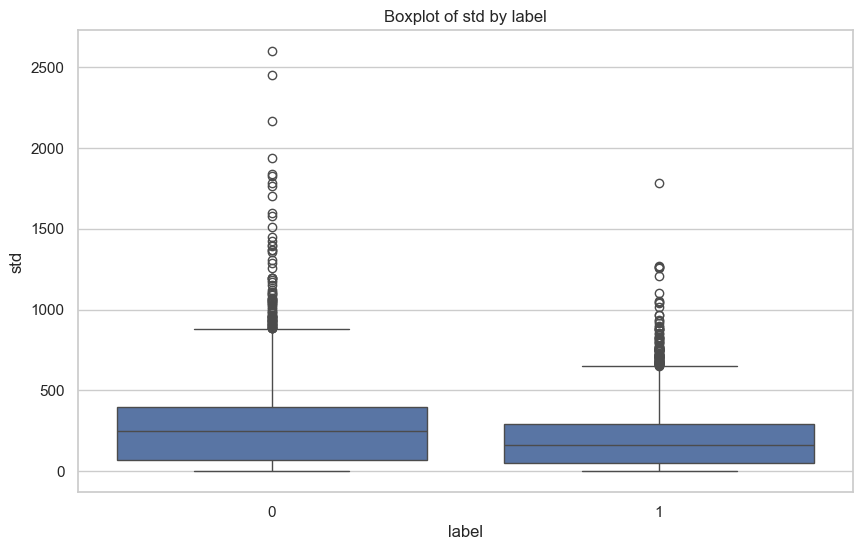



Mean of var by label:
label
0    111090.403398
1     62896.268401
Name: var, dtype: float64


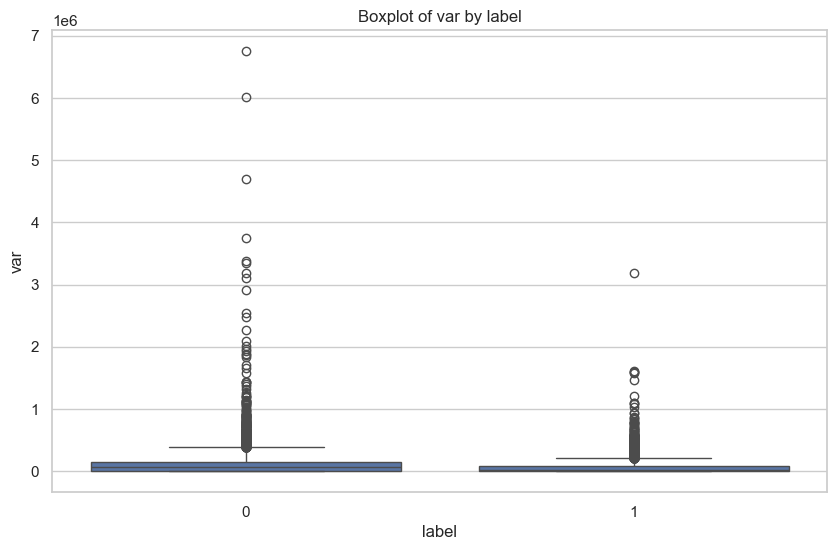

In [17]:
# calculate mean, median, max, std, var by label and plot boxplot
for statistic in ["mean", "median", "max", "std", "var"]:
    print(f"Mean of {statistic} by label:")
    print(calculate_statistic_by_label(data_df, statistic))
    # boxplot of statistic by label
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_df, x="label", y=statistic)
    plt.title(f"Boxplot of {statistic} by label")
    plt.show()
    print("\n")


label             0           1
mean     279.945206  183.388603
median   208.006006  126.512656
min       11.252721    6.849299
max     1195.437218  886.978842


<Figure size 1000x600 with 0 Axes>

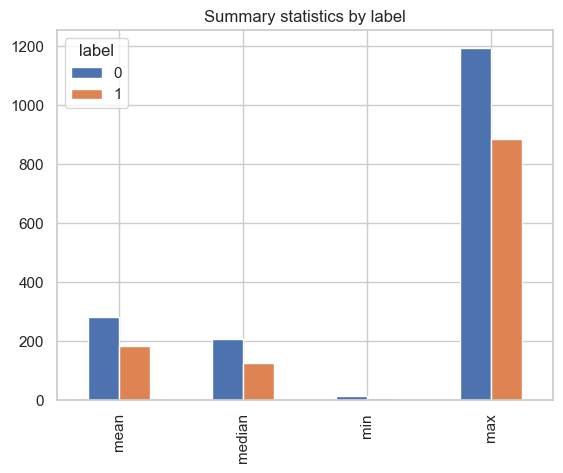

In [18]:
# grouped bar chart for summary statistics by label
data_df2 = data_df.groupby("label")[["mean", "median", "min", "max"]].mean()
data_df2 = data_df2.T
print(data_df2)


# plot grouped bar chart
plt.figure(figsize=(10, 6))
data_df2.plot(kind="bar")
plt.title("Summary statistics by label")
plt.show()

### Density plot of Mean by Label

In addition: Warning message:
package 'ggplot2' was built under R version 4.3.2 


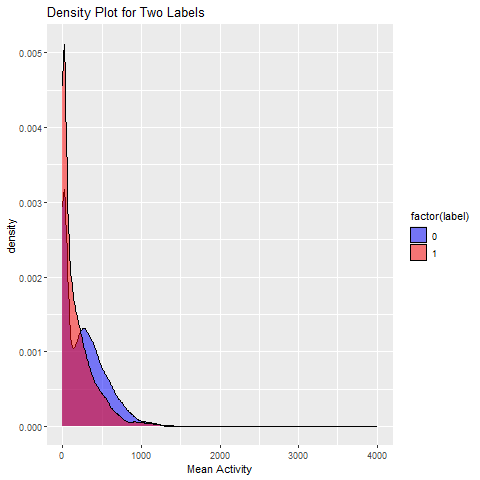

In [22]:
%%R 

# Load necessary libraries
library(ggplot2)

# Create a density plot
ggplot(data_df, aes(x=mean, fill=factor(label))) +
  geom_density(alpha=0.5) +
  labs(title="Density Plot for Two Labels", x="Mean Activity") +
  scale_fill_manual(values=c("blue", "red"))  # Customize colors


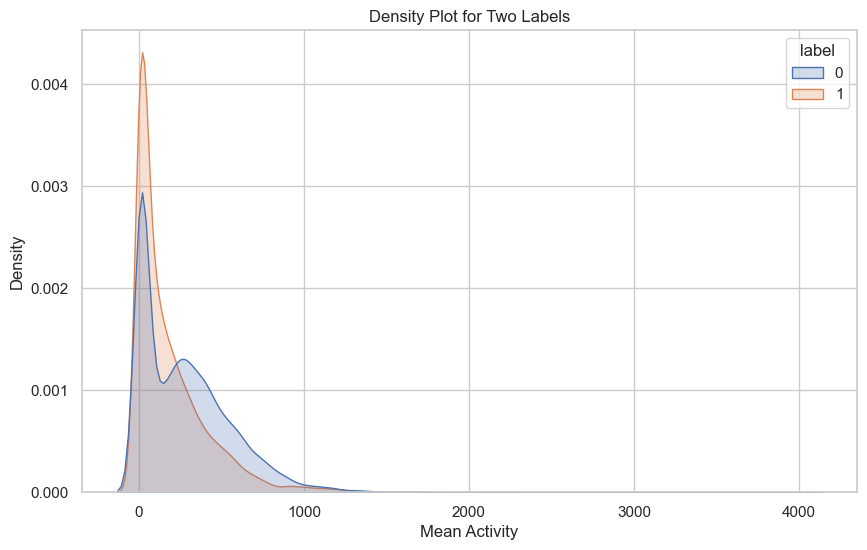

In [23]:
# density plot for mean by label
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_df, x="mean", hue="label", fill=True, common_norm=False)
plt.title("Density Plot for Two Labels")
plt.xlabel("Mean Activity")
plt.show()


### Visualising Descriptive Statistics over time

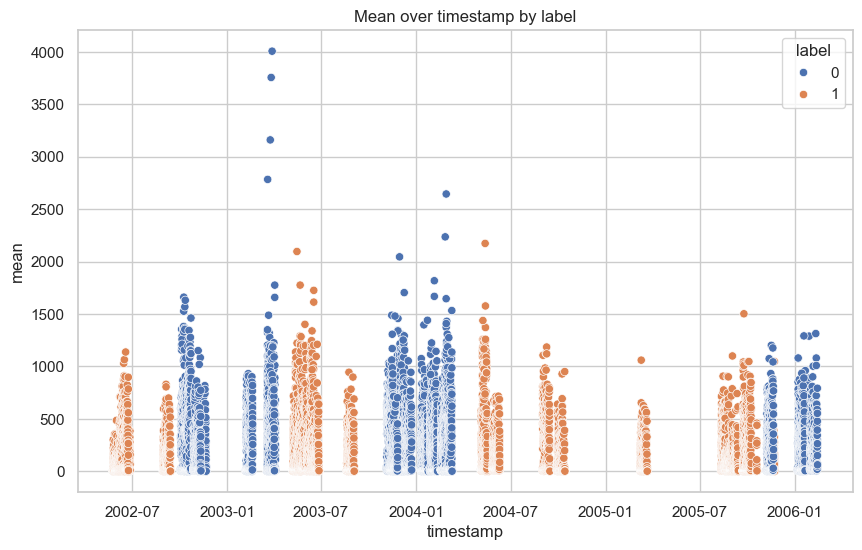

In [24]:
# plot mean over timestamp by label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x="timestamp", y="mean", hue="label")
plt.title("Mean over timestamp by label")
plt.show()


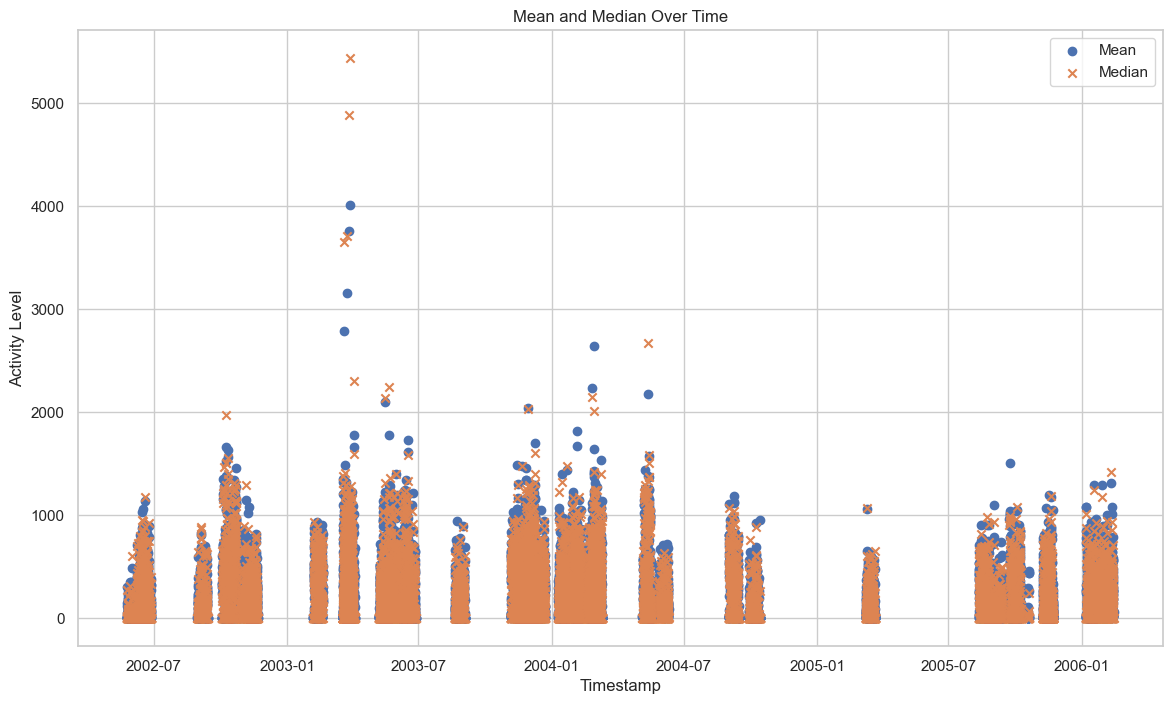

In [25]:
import matplotlib.pyplot as plt

# plot mean and median as scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(data_df['timestamp'], data_df['mean'], label='Mean', marker='o')
plt.scatter(data_df['timestamp'], data_df['median'], label='Median', marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Activity Level')
plt.title('Mean and Median Over Time')
plt.legend()
plt.grid(True)
plt.show()




## Moving Averages and Trends

### Simple moving average (SMA)

* smooth out fluctuations
* average of a specified window by sliding to get overall trend or pattern

why?
* **noise reduction**
* **identify trends**
* **forecasting**



#### Overall SMA

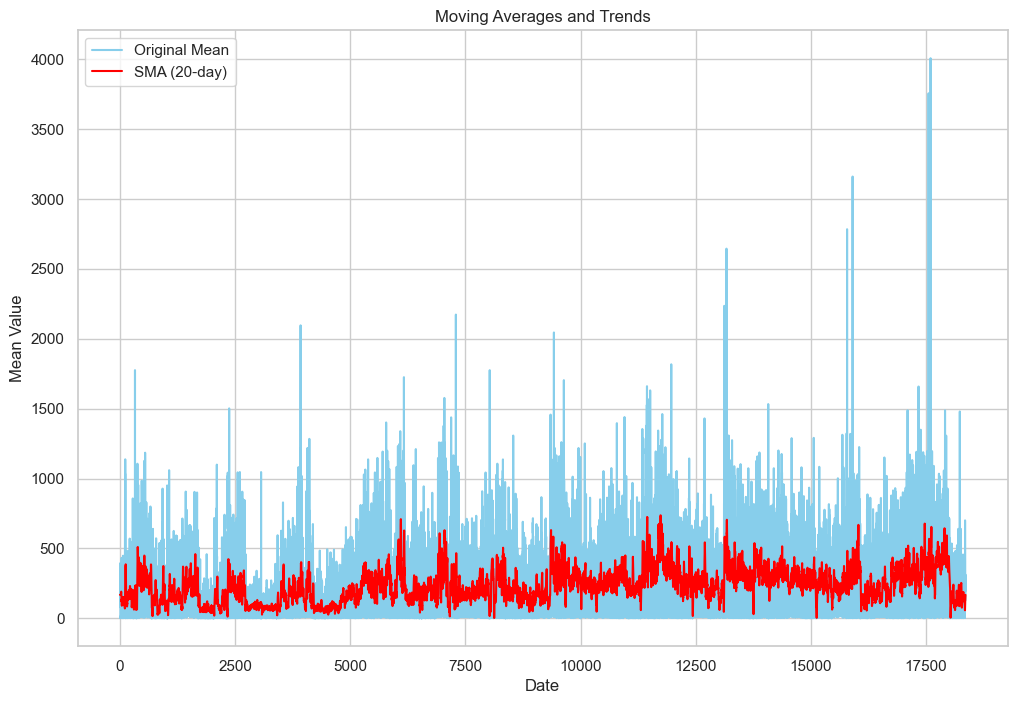

In [26]:


# simple moving average (SMA) for the 'mean' column
window_size = 20
data_df['SMA'] = data_df['mean'].rolling(window=window_size).mean()

# fill NaN values in the SMA column
data_df['SMA'] = data_df['SMA'].bfill()

# figure size
plt.figure(figsize=(12, 8))

# original 'mean' and the SMA
plt.plot(data_df['mean'], label='Original Mean', color='skyblue')
plt.plot(data_df['SMA'], label=f'SMA ({window_size}-day)', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Moving Averages and Trends')
plt.legend()
plt.show()


#### SMA by label

In [27]:
# create SMA for 'mean' by label
data_df['SMA_label'] = data_df.groupby('label')['mean'].transform(lambda x: x.rolling(window=window_size).mean())

# fill NaN with the original 'mean' value
#data_df['SMA_mean_label'] = data_df['SMA_mean_label'].fillna(data_df['mean'])

# fill NaN with 0
#data_df['SMA_mean_label'] = data_df['SMA_mean_label'].fillna(0)

# backfill NaN
data_df['SMA_label'] = data_df['SMA_label'].bfill()


In [28]:
def plot_rolling_average(data_df, window_size, stat, rolling_average_name):
    """
    Plots the original 'stat' and the specified rolling average (e.g., SMA or rolling std) by label in side-by-side plots using the same y-axis.

    Parameters:
    - data_df (DataFrame): The DataFrame containing the data.
    - window_size (int): The window size for calculating the rolling average.
    - stat (str): The column name of the original statistic.
    - rolling_average_name (str): The name of the rolling average (e.g., "SMA" or "Rolling_std").

    Returns:
    - None
    """

    fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
    for label, ax in zip(data_df['label'].unique(), axes):
        data_df_label = data_df[data_df['label'] == label]
        ax.plot(data_df_label[stat], label=f'Original {stat}', color='skyblue')
        ax.plot(data_df_label[f'{rolling_average_name}_label'], label=f'{rolling_average_name} ({window_size}-day)', color='red')
        ax.set_title(f"Label {label}")
        ax.set_xlabel('Date')
        ax.set_ylabel(f'{stat} Value')
        ax.set_xticklabels([])  # hide x-axis labels
        ax.legend()



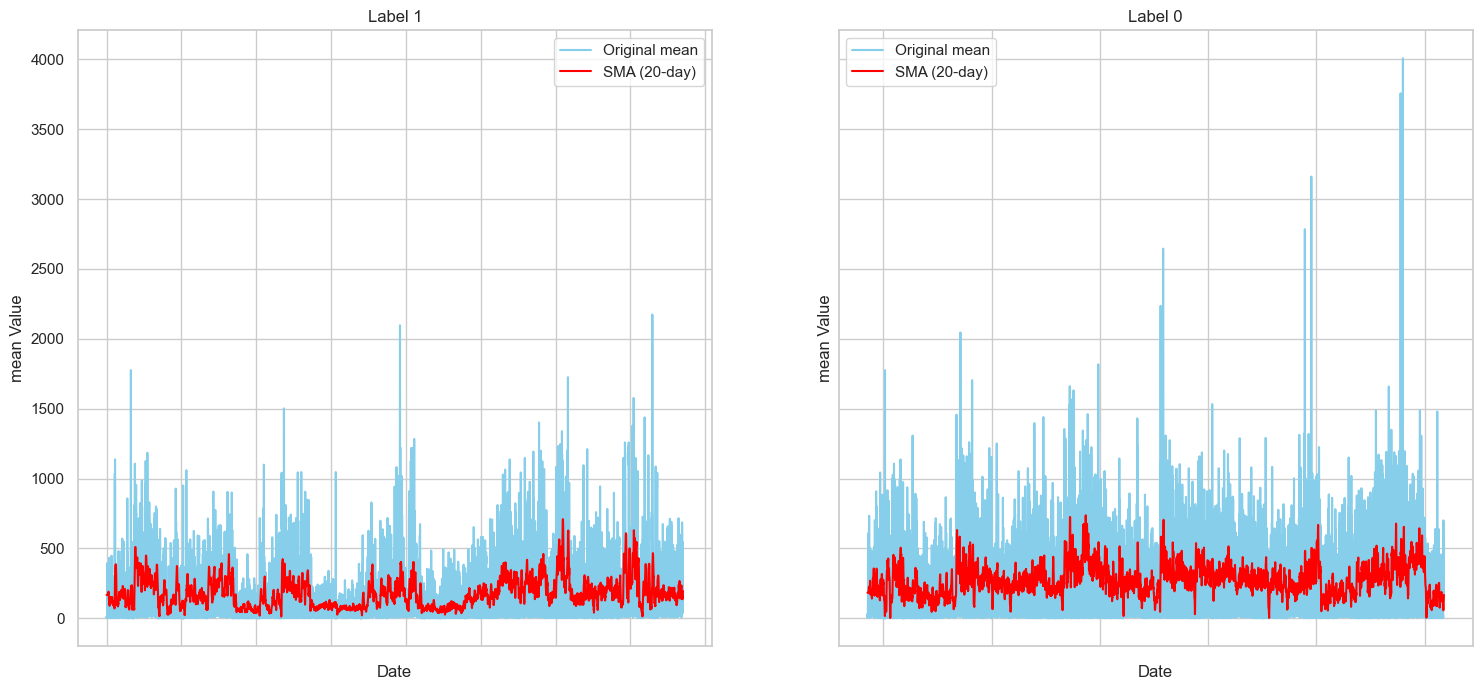

In [29]:
# plot mean and SMA by label
plot_rolling_average(data_df, window_size, 'mean', 'SMA')

In [24]:
# print missing data
#print(f"Missing data: {data_df.isnull().sum()}")

### Rolling standard deviation

#### Overall

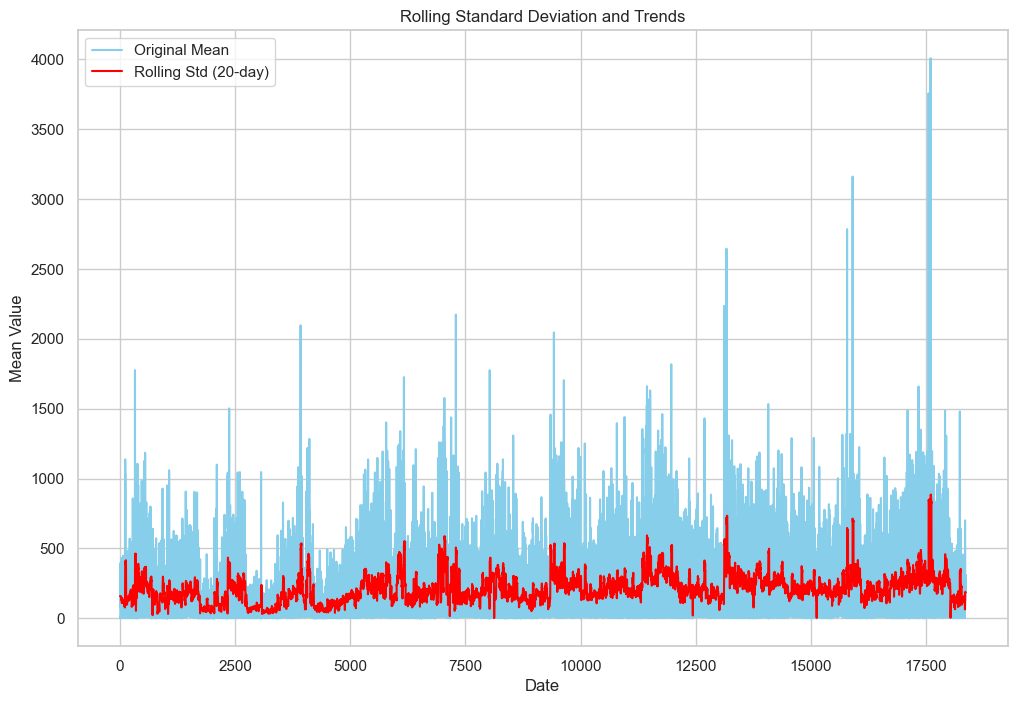

In [30]:
# rolling standard deviation for the 'mean' column
data_df['Rolling_std'] = data_df['mean'].rolling(window=window_size).std()

# backfill NaN
data_df['Rolling_std'] = data_df['Rolling_std'].bfill()

# plot mean and rolling std
plt.figure(figsize=(12, 8))
plt.plot(data_df['mean'], label='Original Mean', color='skyblue')
plt.plot(data_df['Rolling_std'], label=f'Rolling Std ({window_size}-day)', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Rolling Standard Deviation and Trends')
plt.legend()
plt.show()


In [26]:
# info 
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           765 non-null    object        
 1   timestamp    765 non-null    datetime64[ns]
 2   mean         765 non-null    float64       
 3   sum          765 non-null    int64         
 4   median       765 non-null    float64       
 5   std          765 non-null    float64       
 6   var          765 non-null    float64       
 7   min          765 non-null    float64       
 8   max          765 non-null    float64       
 9   date         765 non-null    datetime64[ns]
 10  label        765 non-null    int64         
 11  SMA          765 non-null    float64       
 12  SMA_label    765 non-null    float64       
 13  Rolling_std  765 non-null    float64       
dtypes: datetime64[ns](2), float64(9), int64(2), object(1)
memory usage: 83.8+ KB
None


#### Rolling std by label

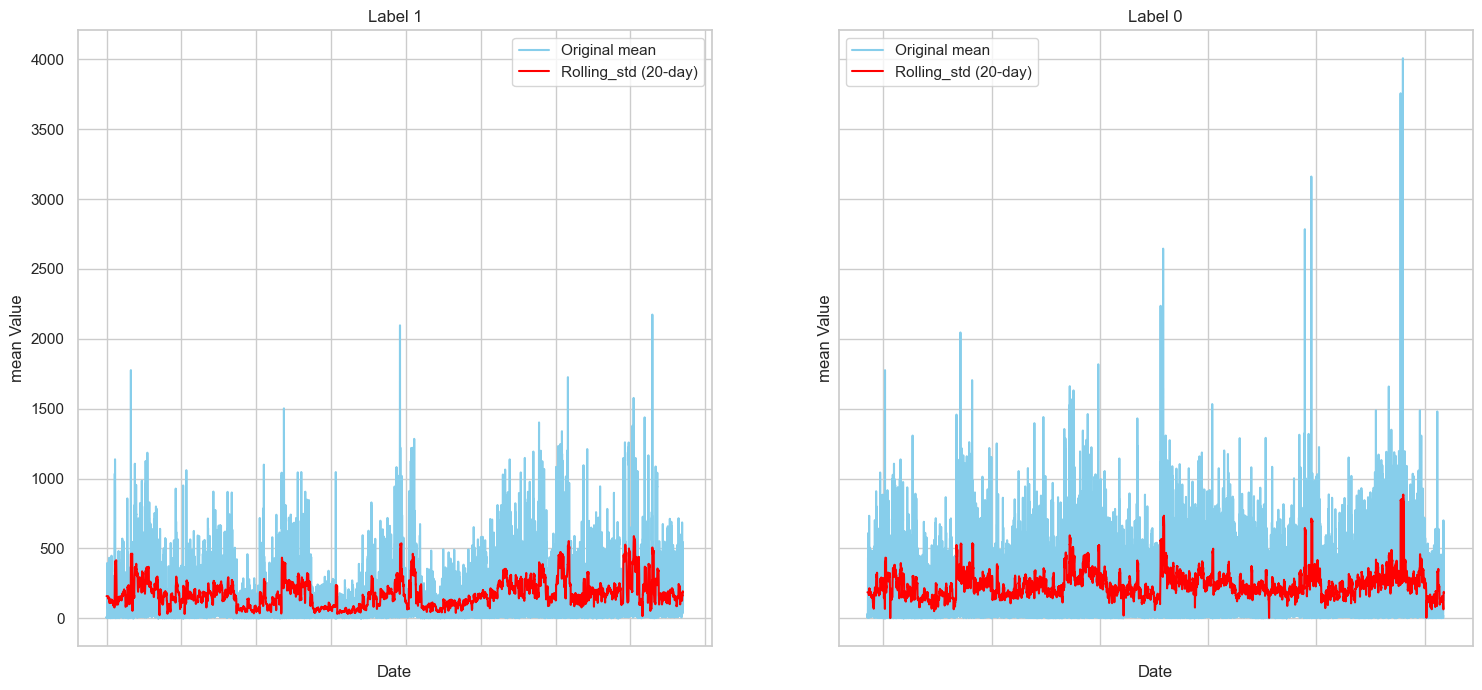

In [31]:
# create rolling standard deviation for 'mean' by label
data_df['Rolling_std_label'] = data_df.groupby('label')['mean'].transform(lambda x: x.rolling(window=window_size).std())
# nan with backfill
data_df['Rolling_std_label'] = data_df['Rolling_std_label'].bfill()

# plot rolling standard deviation
plot_rolling_average(data_df, window_size, 'mean', 'Rolling_std')


### Rolling Correlation

#### Overall 

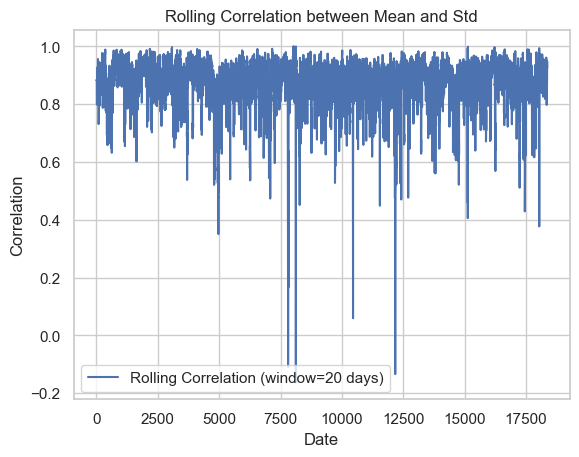

In [32]:
# rolling correlation between 'mean' and 'std'
data_df['rolling_corr'] = data_df['mean'].rolling(window=20).corr(data_df['std'])

# fill NaN backfill
data_df['rolling_corr'] = data_df['rolling_corr'].bfill()

# Plot the rolling correlation
plt.plot(data_df['rolling_corr'], label='Rolling Correlation (window=20 days)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title('Rolling Correlation between Mean and Std')
plt.legend()
plt.show()


In [29]:
# info
#print(data_df.info())

#### By label

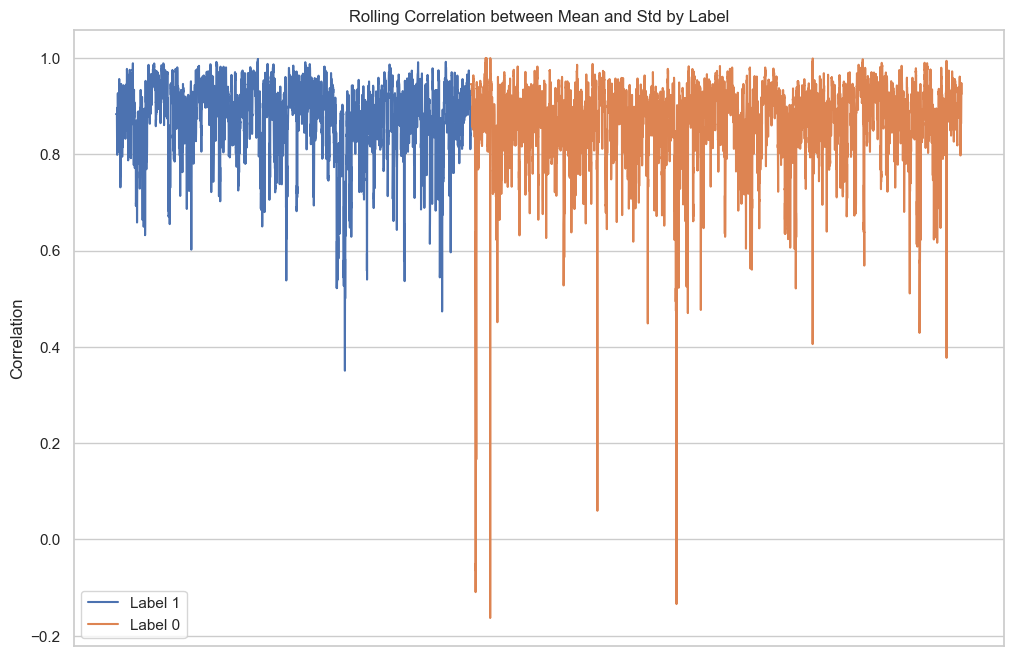

In [33]:
# create rolling correlation by label
data_df['rolling_corr_label'] = data_df.groupby('label')['mean'].transform(lambda x: x.rolling(window=20).corr(data_df['std']))
# backfill NaN
data_df['rolling_corr_label'] = data_df['rolling_corr_label'].bfill()

# plot rolling correlation by labels on the same plot
fig, ax = plt.subplots(figsize=(12, 8))
for label in data_df['label'].unique():
    data_df_label = data_df[data_df['label'] == label]
    ax.plot(data_df_label['rolling_corr_label'], label=f'Label {label}')
ax.set_xlabel('')
ax.set_xticks([])
ax.set_ylabel('Correlation')
ax.set_title('Rolling Correlation between Mean and Std by Label')
ax.legend()
plt.show()


### Rolling covariance

#### Overall

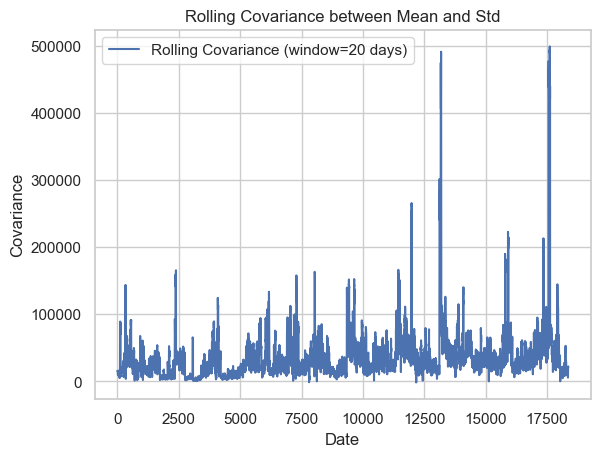

In [34]:
# rolling covariance between 'mean' and 'std'
data_df['rolling_cov'] = data_df['mean'].rolling(window=20).cov(data_df['std'])

# backfill NaN
data_df['rolling_cov'] = data_df['rolling_cov'].bfill()

# Plot the rolling covariance
plt.plot(data_df['rolling_cov'], label='Rolling Covariance (window=20 days)')
plt.xlabel('Date')
plt.ylabel('Covariance')
plt.title('Rolling Covariance between Mean and Std')
plt.legend()
plt.show()


#### By label

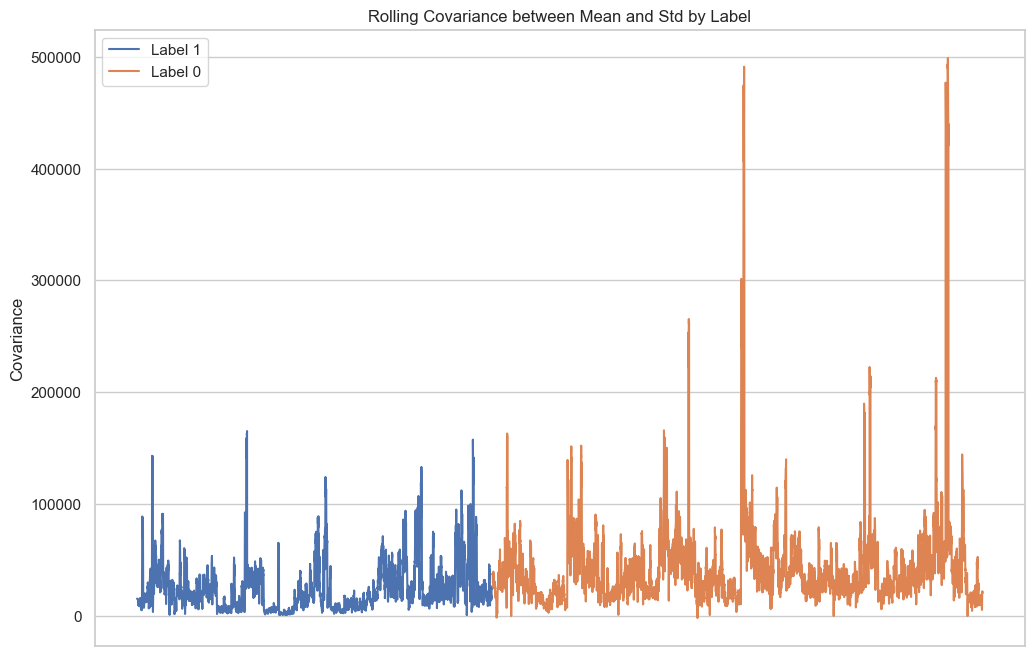

In [35]:
# create rolling covariance by label
data_df['rolling_cov_label'] = data_df.groupby('label')['mean'].transform(lambda x: x.rolling(window=20).cov(data_df['std']))
# backfill NaN
data_df['rolling_cov_label'] = data_df['rolling_cov_label'].bfill()

# plot rolling covariance by labels on the same plot
fig, ax = plt.subplots(figsize=(12, 8))
for label in data_df['label'].unique():
    data_df_label = data_df[data_df['label'] == label]
    ax.plot(data_df_label['rolling_cov_label'], label=f'Label {label}')
ax.set_xlabel('')
ax.set_xticks([])
ax.set_ylabel('Covariance')
ax.set_title('Rolling Covariance between Mean and Std by Label')
ax.legend()
plt.show()


## Time Series Decomposition

* break down into components - level, trend, seasonality, noise

**additive**

$y(t) = \text{{Level}} + \text{{Trend}} + \text{{Seasonality}} + \text{{Noise}}$

**multiplicative**

$ y(t) = \text{{Level}} \times \text{{Trend}} \times \text{{Seasonality}} \times \text{{Noise}}$

### seasonal decompose

In [57]:
#!pip install statsmodels
# print info
#print(data_df.info())
# print the index
#print(data_df.index)
pd.date_range(data_df['timestamp'].min(), data_df['timestamp'].max(), freq='h').difference(data_df['timestamp'])


DatetimeIndex(['2002-05-29 00:00:00', '2002-05-29 01:00:00',
               '2002-05-29 02:00:00', '2002-05-29 03:00:00',
               '2002-05-29 04:00:00', '2002-05-29 05:00:00',
               '2002-05-29 06:00:00', '2002-05-29 07:00:00',
               '2002-05-29 08:00:00', '2002-05-29 09:00:00',
               ...
               '2006-02-09 14:00:00', '2006-02-09 15:00:00',
               '2006-02-09 16:00:00', '2006-02-09 17:00:00',
               '2006-02-09 18:00:00', '2006-02-09 19:00:00',
               '2006-02-09 20:00:00', '2006-02-09 21:00:00',
               '2006-02-09 22:00:00', '2006-02-09 23:00:00'],
              dtype='datetime64[ns]', length=21984, freq=None)

In [62]:
# make copy of df_data
df = data_df.copy()

# print date range of the data, num of days
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Number of days: {df['timestamp'].nunique()}")

# print date range of the data, num of days by labels
print("\nDate range by label:")
print(df.groupby("label")['timestamp'].agg(['min', 'max', 'nunique']))

print(df.info())
print(df.head())

Date range: 2002-05-25 00:00:00 to 2006-02-13 23:00:00
Number of days: 10680

Date range by label:
             min                 max  nunique
label                                        
0     2002-10-03 2006-02-13 23:00:00     5256
1     2002-05-25 2005-11-22 23:00:00     6048
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  18360 non-null  object        
 1   timestamp           18360 non-null  datetime64[ns]
 2   mean                18360 non-null  float64       
 3   sum                 18360 non-null  int64         
 4   median              18360 non-null  float64       
 5   std                 18360 non-null  float64       
 6   var                 18360 non-null  float64       
 7   min                 18360 non-null  float64       
 8   max                 18360 non-null  float64

The data range is huge for 55 respondents - the plots will be a mess. 

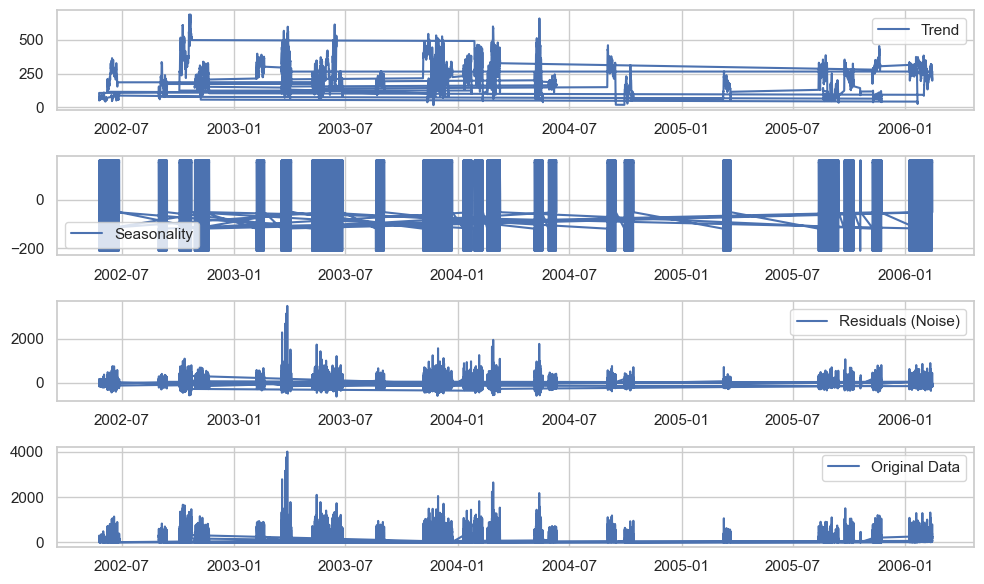

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df.set_index('timestamp', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['mean'], model='additive', period=24)  # Adjust 'period' as needed

# Plot the components
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals (Noise)')
plt.legend()
plt.subplot(414)
plt.plot(df['mean'], label='Original Data')
plt.legend()
plt.tight_layout()
plt.show()



Somehow we need to get the seasonality by id and then aggregate into label for comparison, investigation.

1. time series for each id
2. seasonal decomposition for each id independently
3. aggregate by label
4. plot

attempt 2

In [52]:
# create dataframe of label ==0
df_label_0 = df[df['label'] == 0]
# create dataframe of label ==1
df_label_1 = df[df['label'] == 1]

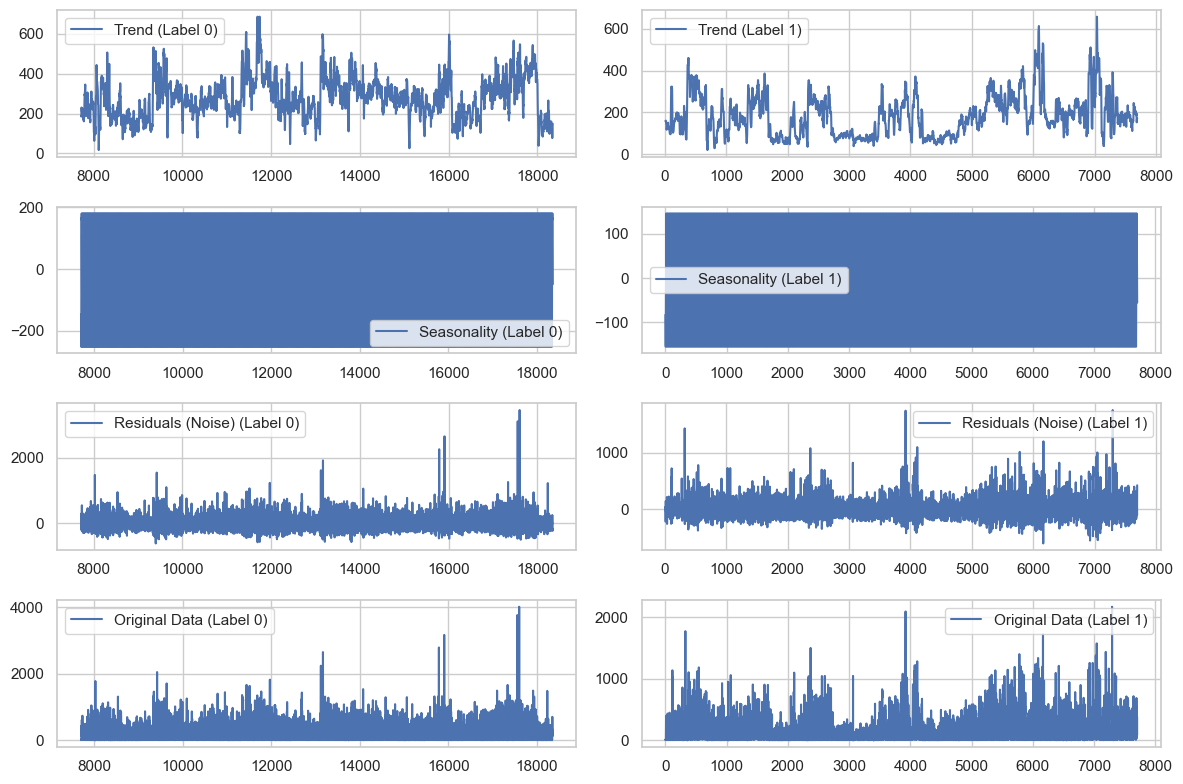

In [67]:
# decomposition of label 0
result_label_0 = seasonal_decompose(df_label_0['mean'], model='additive', period=24)

# decomposition of label 1
result_label_1 = seasonal_decompose(df_label_1['mean'], model='additive', period=24)

# Plot the components side-by-side
plt.figure(figsize=(12, 8))

# Plot label 0 components
plt.subplot(421)
plt.plot(result_label_0.trend, label='Trend (Label 0)')
plt.legend()
plt.subplot(423)
plt.plot(result_label_0.seasonal, label='Seasonality (Label 0)')
plt.legend()
plt.subplot(425)
plt.plot(result_label_0.resid, label='Residuals (Noise) (Label 0)')
plt.legend()
plt.subplot(427)
plt.plot(df_label_0['mean'], label='Original Data (Label 0)')
plt.legend()

# Plot label 1 components
plt.subplot(422)
plt.plot(result_label_1.trend, label='Trend (Label 1)')
plt.legend()
plt.subplot(424)
plt.plot(result_label_1.seasonal, label='Seasonality (Label 1)')
plt.legend()
plt.subplot(426)
plt.plot(result_label_1.resid, label='Residuals (Noise) (Label 1)')
plt.legend()
plt.subplot(428)
plt.plot(df_label_1['mean'], label='Original Data (Label 1)')
plt.legend()

plt.tight_layout()
plt.show()



The seasonal decomposition as above do not feel so useful...I wonder if aggregating to get an average day for each label and decomposing that will yield a clearer picture.

###

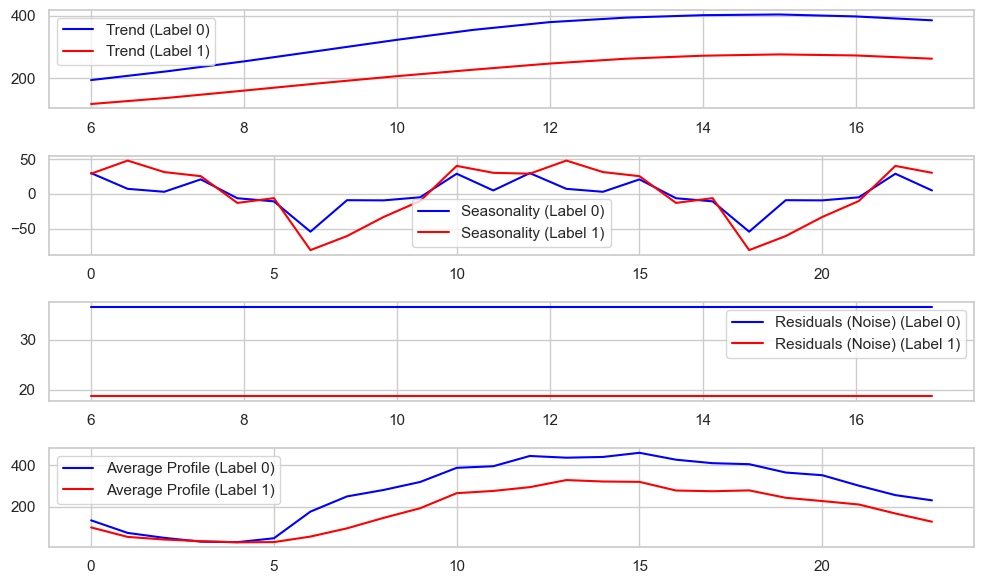

In [72]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# average profiles for label 0 and label 1
avg_profile_label0 = df[df['label'] == 0].groupby(df[df['label'] == 0].index.hour)['mean'].mean()
avg_profile_label1 = df[df['label'] == 1].groupby(df[df['label'] == 1].index.hour)['mean'].mean()

# seasonal decomposition for both profiles
decomposition_label0 = seasonal_decompose(avg_profile_label0, model='additive', period=12)
decomposition_label1 = seasonal_decompose(avg_profile_label1, model='additive', period=12)

# Plot the components on top of each other
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(decomposition_label0.trend, label='Trend (Label 0)', color='blue')
plt.plot(decomposition_label1.trend, label='Trend (Label 1)', color='red')
plt.legend()
plt.subplot(412)
plt.plot(decomposition_label0.seasonal, label='Seasonality (Label 0)', color='blue')
plt.plot(decomposition_label1.seasonal, label='Seasonality (Label 1)', color='red')
plt.legend()
plt.subplot(413)
plt.plot(decomposition_label0.resid, label='Residuals (Noise) (Label 0)', color='blue')
plt.plot(decomposition_label1.resid, label='Residuals (Noise) (Label 1)', color='red')
plt.legend()
plt.subplot(414)
plt.plot(avg_profile_label0, label='Average Profile (Label 0)', color='blue')
plt.plot(avg_profile_label1, label='Average Profile (Label 1)', color='red')
plt.legend()
plt.tight_layout()
plt.show()





version 1 below

In [43]:

# step1 - ts for each id
id_series = df.groupby('id')['mean'].apply(list)


In [44]:
# print lengths of each id series
print(id_series.apply(len))

id
condition_1     360
condition_10    336
condition_11    336
condition_12    312
condition_13    360
condition_14    336
condition_15    288
condition_16    408
condition_17    336
condition_18    336
condition_19    336
condition_2     456
condition_20    288
condition_21    288
condition_22    336
condition_23    408
condition_3     336
condition_4     312
condition_5     336
condition_6     336
condition_7     312
condition_8     240
condition_9     312
control_1       336
control_10      336
control_11      336
control_12      312
control_13      312
control_14      336
control_15      336
control_16      336
control_17      312
control_18      312
control_19      336
control_2       480
control_20      312
control_21      336
control_22      336
control_23      336
control_24      312
control_25      336
control_26      336
control_27      312
control_28      384
control_29      336
control_3       336
control_30      312
control_31      312
control_32      312
control_4       3

In [45]:

# step2 - seasonal decomposition for each id
seasonal_components = {}
for id, series in id_series.items():
    result = seasonal_decompose(series, model='additive', period=5)  # adjust 'period' as needed
    seasonal_components[id] = result.seasonal


In [46]:

# step3 -  aggregate seasonal components by label
label_aggregated_seasonality = {}
for label in df['label'].unique():
    label_data = df[df['label'] == label] # subset data for the label
    label_ids = label_data['id'].unique() # unique ids for the label
    max_length = max(len(seasonal_components[id]) for id in label_ids) # max length of seasonal components
    aggregated_seasonality = np.zeros(max_length) # initialise aggregated seasonality
    for id in label_ids: 
        seasonal_component = seasonal_components[id] # seasonal component for the id
        if len(seasonal_component) < max_length: 
            seasonal_component = np.pad(seasonal_component, (0, max_length - len(seasonal_component)), 'constant', constant_values=np.nan) # pad with NaNs
        aggregated_seasonality += seasonal_component # aggregate
    label_aggregated_seasonality[label] = aggregated_seasonality / len(label_ids)


In [47]:
print(seasonal_components)

{'condition_1': array([17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8.33241797, -4.89133816,
       17.28373226,  5.50899048, -9.56896661, -8

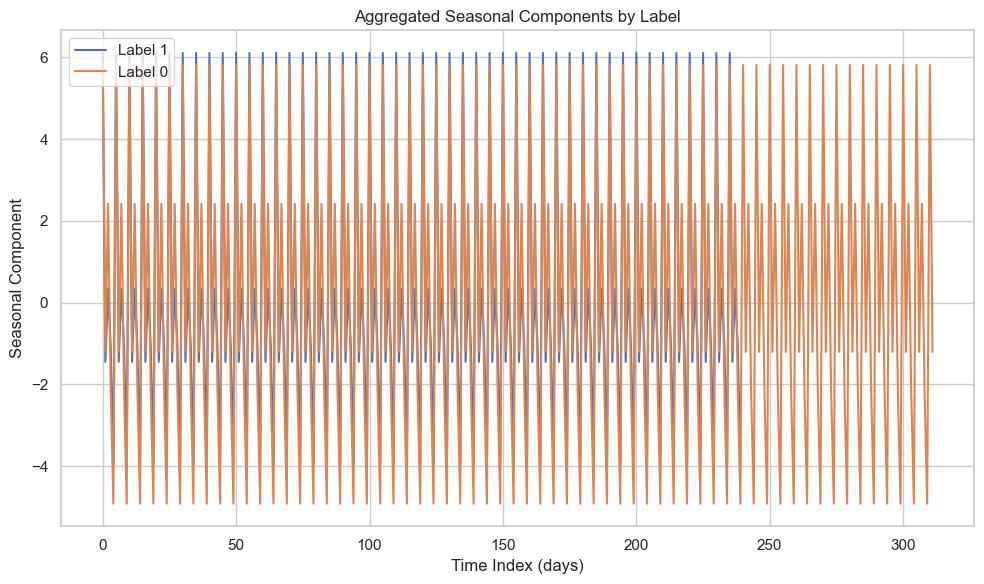

In [48]:
# step4 - plot the aggregated seasonal components
plt.figure(figsize=(10, 6))
for label, seasonality in label_aggregated_seasonality.items():
    plt.plot(seasonality, label=f'Label {label}')
plt.legend(loc='upper left')
plt.title('Aggregated Seasonal Components by Label')
plt.xlabel('Time Index (days)')
# remove xticks
#plt.xticks([])
plt.ylabel('Seasonal Component')
plt.tight_layout()
plt.show()


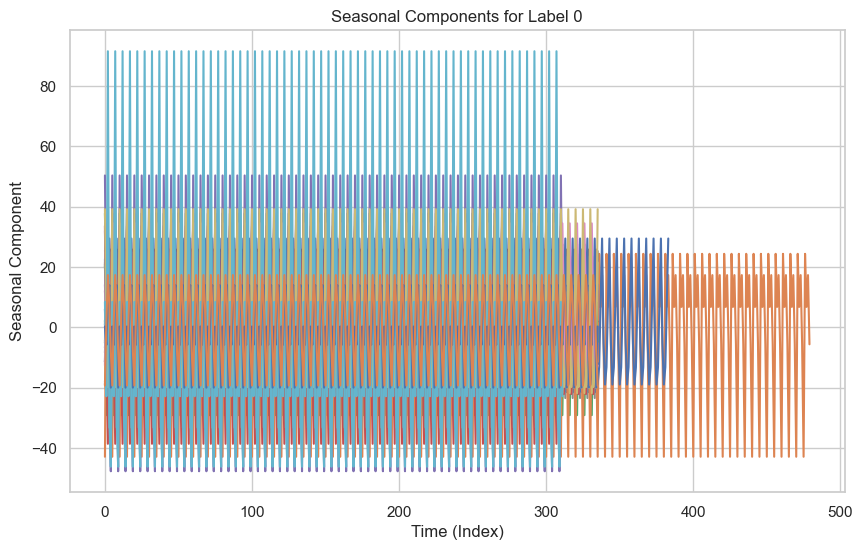

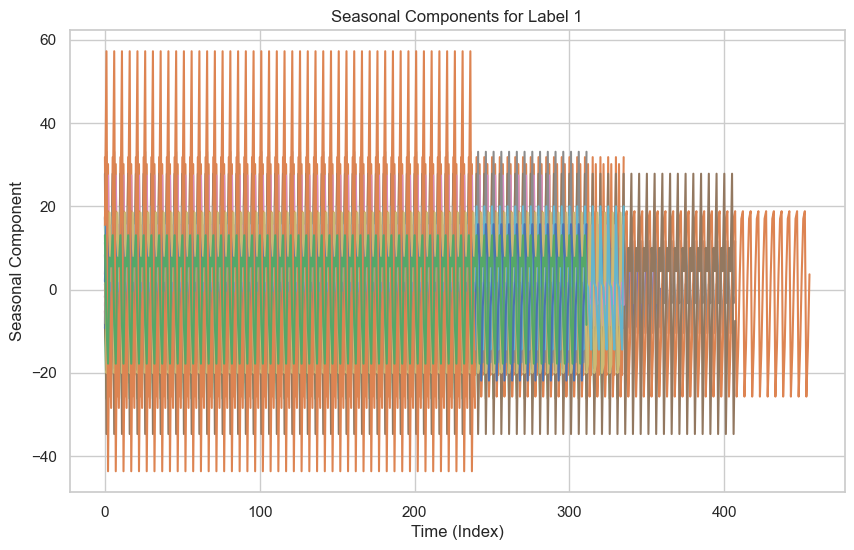

In [49]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


# seasonal components for label 0
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for id, seasonality in seasonal_components.items():
    if df[df['id'] == id]['label'].iloc[0] == 0:
        plt.plot(seasonality)

plt.xlabel('Time (Index)')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Components for Label 0')
plt.show()

# seasonal components for label 1
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for id, seasonality in seasonal_components.items():
    if df[df['id'] == id]['label'].iloc[0] == 1:
        plt.plot(seasonality)

plt.xlabel('Time (Index)')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Components for Label 1')
plt.show()


Time Series Decomposition:
Decompose your time series data into its components: trend, seasonality, cyclicity, and irregularities.
Use techniques like moving averages, exponential smoothing, or STL decomposition (Seasonal-Trend decomposition using LOESS) to separate these components.
Visualize each component separately to understand their contributions to the overall time series.

Trend: The underlying long-term movement.
Seasonal: Repeating patterns (e.g., daily, weekly, yearly).
Residual: Random fluctuations.

Exponential Smoothing:
Apply exponential smoothing techniques (e.g., Holt-Winters) to detect patterns and forecast future values.
Plot smoothed curves alongside the original data.

ARIMA (AutoRegressive Integrated Moving Average):
ARIMA combines autoregression, differencing, and moving averages for time series forecasting.
Identify optimal parameters (p, d, q) through ACF and PACF plots.
Fit an ARIMA model and visualize the residuals.

Fourier Transforms:
Decompose your time series into its constituent frequencies.
Useful for analyzing periodic patterns (e.g., daily cycles).
Visualize the frequency domain using power spectra or periodograms.

Frequency Domain Features:
Fourier transform results or spectral analysis features.
Useful for identifying dominant frequencies.

Time Series Line Plots:
Plot the time series itself (e.g., mean activity levels) over time. You can use line plots or scatter plots with a time axis.
Color-code the lines based on the label (depression vs. non-depression) to observe any patterns or trends.

Correlation Heatmap:
Compute correlations between features (e.g., mean, median, std) and create a heatmap.
This can help you identify strong positive or negative relationships between variables.

Lag Plots (Autocorrelation):
Investigate autocorrelation by plotting the time series against its lagged versions (e.g., mean at t vs. mean at t-1).
This can reveal seasonality or cyclic patterns.